<div style="background-color:maroon; padding:10px;">
</div>

# AM 205 - Advanced Scientific Computing: Numerical Methods
<div style="background-color:maroon; padding:10px;">
</div>

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Prof. Nick Trefethen<br/>
**Author**: Elaine Swanson

### 1. **p5.m** - dense, sparse, and iterative
#### This script demonstrates the differences between dense matrix solvers (which are slow for large systems) and sparse matrix solvers (which are much faster for systems with structured sparsity, like banded matrices). It compares direct methods (Gaussian elimination) with iterative methods (Conjugate Gradient), showing that iterative solvers can be much faster for large, well-conditioned matrices. Also, it highlights the importance of choosing the right solver depending on the matrix structure (dense vs. sparse) and the problem size. Sparse methods are essential for efficiently solving large linear systems where many elements are zero, avoiding unnecessary computation.

- **Bandwidth** in the context of matrices refers to the distance from the main diagonal where non-zero elements appear. Specifically, a matrix is said to have a bandwidth $𝑘$ if all its non-zero elements are confined within the main diagonal and $𝑘$ diagonals above and below the main diagonal.
    - **Upper Bandwidth**: The number of diagonals above the main diagonal that contain non-zero elements.
    - **Lower Bandwidth**: The number of diagonals below the main diagonal that contain non-zero elements.
- The spy plot provides a visual representation of the matrix's sparsity structure, which is useful for understanding the matrix's properties and choosing the appropriate solver.
    - In our example: lower bandwidth: 50 (diagonals below the main diagonal).
    - Upper bandwidth: 50 (diagonals above the main diagonal).
    - The main diagonal itself contributes 1.

In [1]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import cg  ## conjugate gradient method
from scipy.linalg import solve
import matplotlib.pyplot as plt
import time

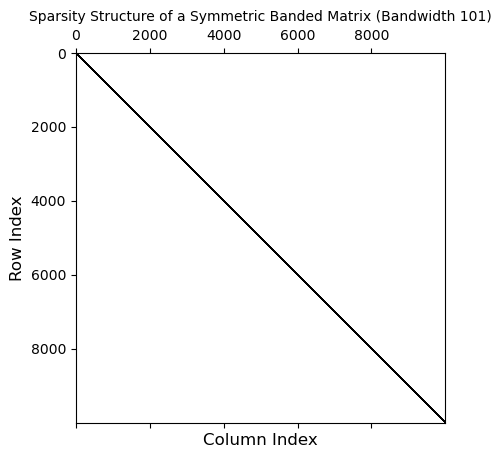

In [3]:
## a big ol' symmetric matrix with bandwidth 101
n = 10000
A = np.random.randn(n, n) / np.sqrt(n)
A = np.tril(np.triu(A, -50), 50)  ## set bandwidth
A = A + A.T + np.eye(n)  ## make it symmetric by adding its transpose and identity
plt.spy(A)
plt.title("Sparsity Structure of a Symmetric Banded Matrix (Bandwidth 101)", fontsize=10)
plt.xlabel("Column Index", fontsize=12)
plt.ylabel("Row Index", fontsize=12)
plt.show()

In [5]:
## straight up Gaussian elimination is pretty slow:
b = np.ones(n)
start_time = time.time()
solve(A, b)
print(f"GE time: {time.time() - start_time:.2f} seconds")

## conjugate gradients is much faster:
## can you check if A is well conditioned from the p4.m example?
start_time = time.time()
x, info = cg(A, b)
print(f"Conjugate Gradient time: {time.time() - start_time:.2f} seconds")

## convert A to sparse format and use direct sparse methods:
A_sparse = sp.csr_matrix(A)
start_time = time.time()
sp.linalg.spsolve(A_sparse, b)
print(f"Sparse Direct Solve time: {time.time() - start_time:.2f} seconds")

GE time: 9.62 seconds
Conjugate Gradient time: 0.32 seconds
Sparse Direct Solve time: 0.15 seconds
